In [3]:
import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random

In [4]:
dt = pd.read_table('1314/2M1314e3-LLRR.dat')
binned = binning(dt,sec=10)

def binPlot(Type='sec'):
    if Type == 'minutes':
        plt.errorbar(binned['dtmin'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['dtmin'],binned['re'],color='black',label='Data')
    else:
        plt.errorbar(binned['secs'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['secs'],binned['re'],color='black',label='Data') 
        

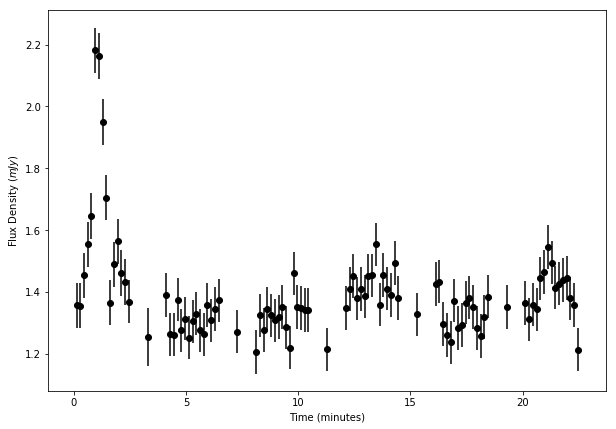

In [6]:
plt.figure(figsize=(10,7))
binPlot('minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Flux Density ($mJy$)')
plt.show()

In [52]:
rr = pd.read_table('1314/2M1314e3-RR.dat')
ll = pd.read_table('1314/2M1314e3-LL.dat')


rr = binning(rr,10)
ll = binning(ll,10)


In [53]:
stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
frac = stV/stI
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5
time = rr['dtmin']

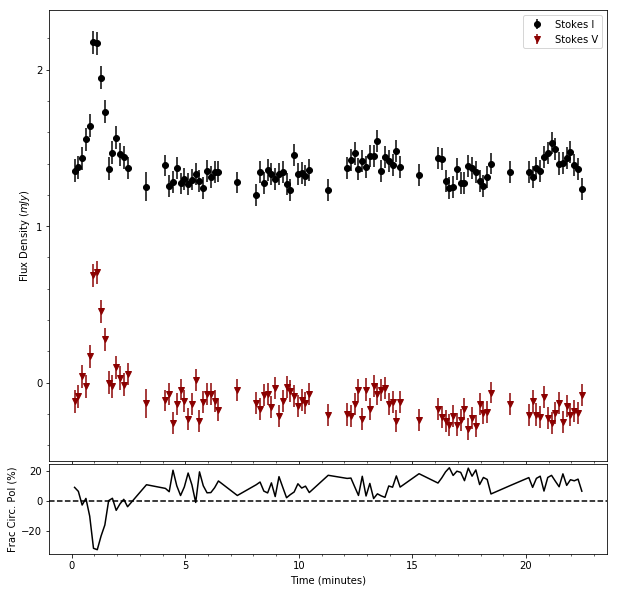

In [56]:
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=1,sharex=True,gridspec_kw = {'hspace':.01,'height_ratios':[5,1]})
ax[0].errorbar(time,stI,yerr=stErr,color='k',fmt='o',linestyle='None',label='Stokes I')
ax[0].errorbar(time,-stV,yerr=stErr,color='darkred',fmt='v',linestyle='None',label='Stokes V')
#ax[0].axhline(y=0,color='k',linestyle='dashed')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].locator_params(axis='y',nbins=4)
ax[0].minorticks_on()
ax[1].plot(time,100*frac,color='k')
ax[1].axhline(y=0,color='k',linestyle='dashed')
ax[1].set_ylabel('Frac Circ. Pol (%)')
plt.xlabel('Time (minutes)')
#plt.savefig('plots/1314e3_Stokes.png')
plt.show()

In [68]:
low = pd.read_table('1314/2M1314e3-5GHz.dat')
high = pd.read_table('1314/2M1314e3-7GHz.dat')

low = low[low['nsamp']>500]
high = high[high['nsamp']>500]

low = binning(low,10)
high = binning(high,10)


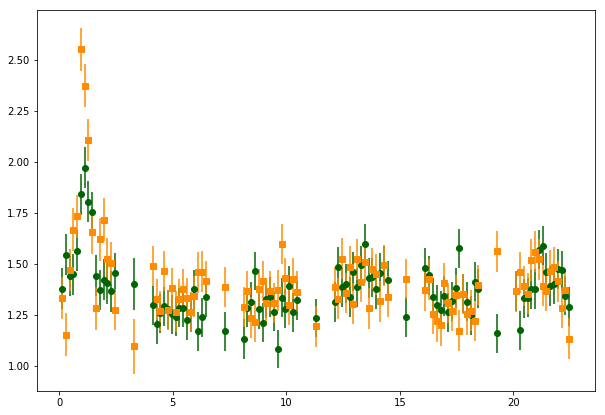

In [76]:
plt.figure(figsize=(10,7))
plt.errorbar(low['dtmin'],low['re'],yerr=low['ure'],color='darkgreen',fmt='o',linestyle='None',label='5 GHz')
plt.errorbar(high['dtmin'],high['re'],yerr=high['ure'],color='darkorange',fmt='s',linestyle='None',label='7 GHz')
plt.legend(loc)
plt.show()